In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

C:\Users\Ganesha\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df = pd.read_csv('C:/Users/Ganesha/Desktop/Sem 1/Datasets/uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [4]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [5]:
df.dropna(inplace = True)

In [6]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [7]:
df.drop(columns=['Unnamed: 0','key'],inplace = True)

In [8]:
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

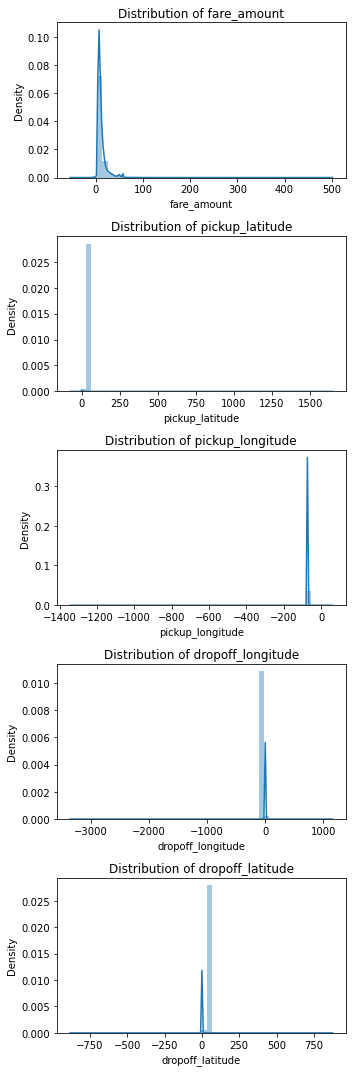

In [10]:
columns_to_plot = ['fare_amount', 'pickup_latitude', 'pickup_longitude', 'dropoff_longitude', 'dropoff_latitude']

fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(5, 15))
for i, column in enumerate(columns_to_plot):
    sns.distplot(df[column], ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')
    axes[i].set_xlabel(column)
    
plt.tight_layout()
plt.show()

In [11]:
def find_outliers_IQR(df):
   q1 = df.quantile(0.25)
   q3 = df.quantile(0.75)
   IQR = q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

In [12]:
#getting outlier details for column "fair_amount" using the above function

outliers = find_outliers_IQR(df["fare_amount"])
print("number of outliers: "+ str(len(outliers)))
print("max outlier value: "+ str(outliers.max()))
print("min outlier value: "+ str(outliers.min()))
outliers

number of outliers: 17166
max outlier value: 499.0
min outlier value: -52.0


6         24.50
30        25.70
34        39.50
39        29.00
48        56.80
          ...  
199976    49.70
199977    43.50
199982    57.33
199985    24.00
199997    30.90
Name: fare_amount, Length: 17166, dtype: float64

In [13]:
outliers = find_outliers_IQR(df[["passenger_count","fare_amount"]])
outliers

,passenger_count,fare_amount
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,5.0,NaN
...,...,...
199995,NaN,NaN
199996,NaN,NaN
199997,NaN,30.9
199998,NaN,NaN


In [14]:
#upper and lower limit which can be used for capping of outliers

upper_limit = df['fare_amount'].mean() + 3*df['fare_amount'].std()
print(upper_limit)
lower_limit = df['fare_amount'].mean() - 3*df['fare_amount'].std()
print(lower_limit)

41.06517154774204
-18.3453884488253


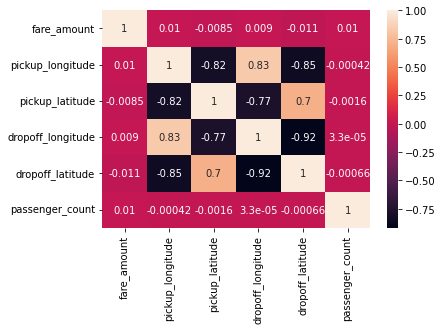

In [15]:
#creating a correlation matrix

corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
df['week_day'] = df['pickup_datetime'].dt.day_name()
df['Year'] = df['pickup_datetime'].dt.year
df['Month'] = df['pickup_datetime'].dt.month
df['Hour'] = df['pickup_datetime'].dt.hour
df.drop(['pickup_datetime'],axis=1,inplace=True)

In [17]:
df.head()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,week_day,Year,Month,Hour
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,Thursday,2015,5,19
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,Friday,2009,7,20
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,Monday,2009,8,21
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,Friday,2009,6,8
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,Thursday,2014,8,17


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   week_day           199999 non-null  object 
 7   Year               199999 non-null  int64  
 8   Month              199999 non-null  int64  
 9   Hour               199999 non-null  int64  
dtypes: float64(5), int64(4), object(1)
memory usage: 16.8+ MB


In [19]:
df.week_day = df.week_day.map({'Sunday':0,'Monday':1,'Tuesday':2,'Wednesday':3,'Thursday':4,'Friday':5,'Saturday':6})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 199999 entries, 0 to 199999
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   fare_amount        199999 non-null  float64
 1   pickup_longitude   199999 non-null  float64
 2   pickup_latitude    199999 non-null  float64
 3   dropoff_longitude  199999 non-null  float64
 4   dropoff_latitude   199999 non-null  float64
 5   passenger_count    199999 non-null  int64  
 6   week_day           199999 non-null  int64  
 7   Year               199999 non-null  int64  
 8   Month              199999 non-null  int64  
 9   Hour               199999 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 16.8 MB


In [21]:
#splitting the data into train and test

from sklearn.model_selection import train_test_split

In [22]:
#independent variables (x)

x=df.drop("fare_amount", axis=1)

#dependent variable (y)

y=df["fare_amount"]

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [25]:
#Linear Regression

from sklearn.linear_model import LinearRegression
lrmodel=LinearRegression()
lrmodel.fit(x_train, y_train)

LinearRegression()

In [26]:
lrmodel_pred = lrmodel.predict(x_test)

In [27]:
#Random Forest Regression

from sklearn.ensemble import RandomForestRegressor
rfrmodel = RandomForestRegressor(n_estimators=100, random_state=101)

In [28]:
rfrmodel.fit(x_train,y_train)
rfrmodel_pred= rfrmodel.predict(x_test)

In [32]:
#Calculating the value of RMSE for Linear Regression
import numpy as np

from sklearn.metrics import mean_squared_error
lrmodelrmse = np.sqrt(mean_squared_error(lrmodel_pred, y_test))
print("RMSE value for Linear regression is", lrmodelrmse)

RMSE value for Linear regression is 9.80660002913504


In [33]:
#Calculating the value of RMSE for Random Forest Regression

rfrmodel_rmse=np.sqrt(mean_squared_error(rfrmodel_pred, y_test))
print("RMSE value for Random forest regression is ",rfrmodel_rmse)

RMSE value for Random forest regression is  4.7603593586934645
